## Question 8 Simple linear regression

In [136]:
library(ISLR)
data(Auto)

In [6]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [7]:
auto.lm = lm(mpg ~ horsepower, data = Auto)

In [8]:
summary(auto.lm)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


With more horsepower, you will get worse mpg. This is common sense. The relationship between the predictor and response is also quite strong given the small pvalue. 

In [11]:
predict(auto.lm, newdata = data.frame(horsepower = 98), interval = 'confidence')

fit,lwr,upr
24.46708,23.97308,24.96108


In [12]:
predict(auto.lm, newdata = data.frame(horsepower = 98), interval = 'prediction')

fit,lwr,upr
24.46708,14.8094,34.12476


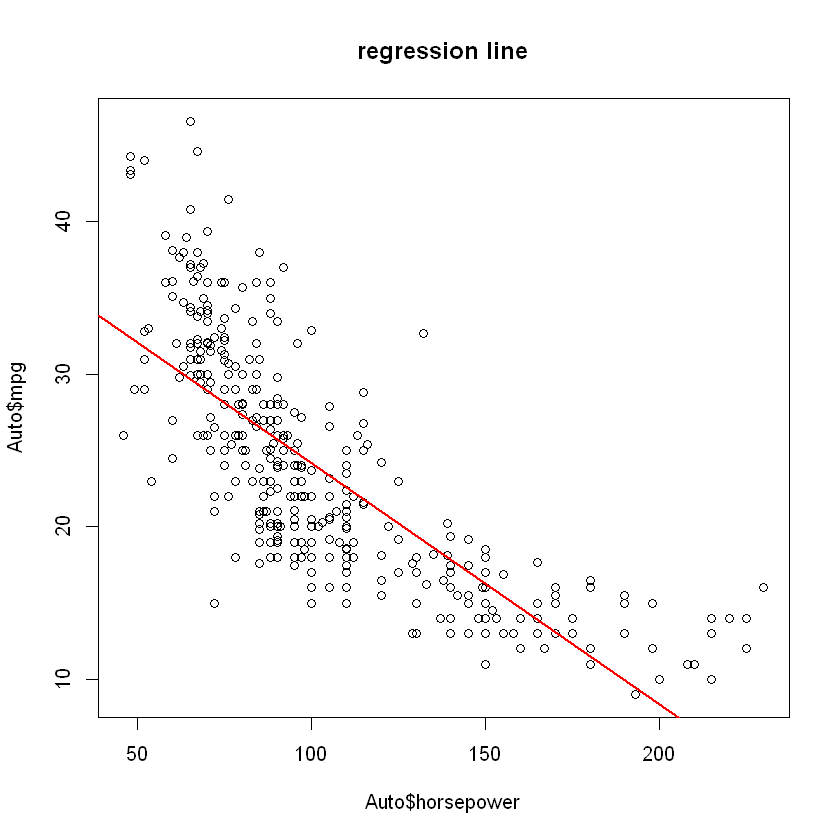

In [18]:
plot(Auto$horsepower, Auto$mpg, main = 'regression line')
abline(auto.lm, col = 'red', lw = 2)

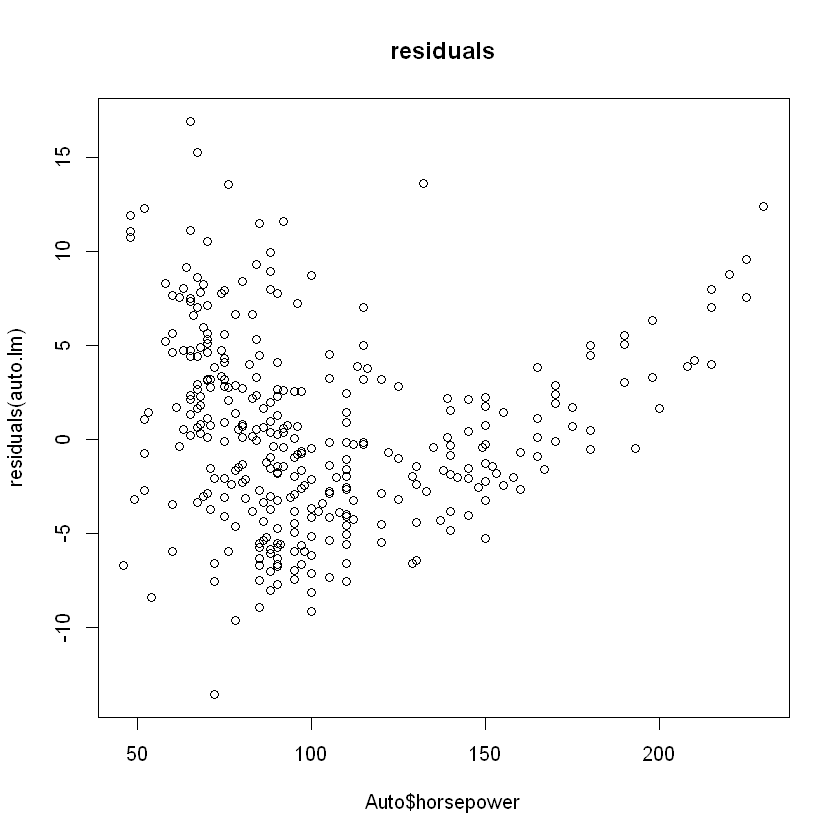

In [27]:
plot(Auto$horsepower, residuals(auto.lm), main = 'residuals')

The residuals are not normally distributed so our linear model does not fit the data well. This is also obvious when you plot the data points and the regression line on the same plot.

## Question 9 Multiple linear regression

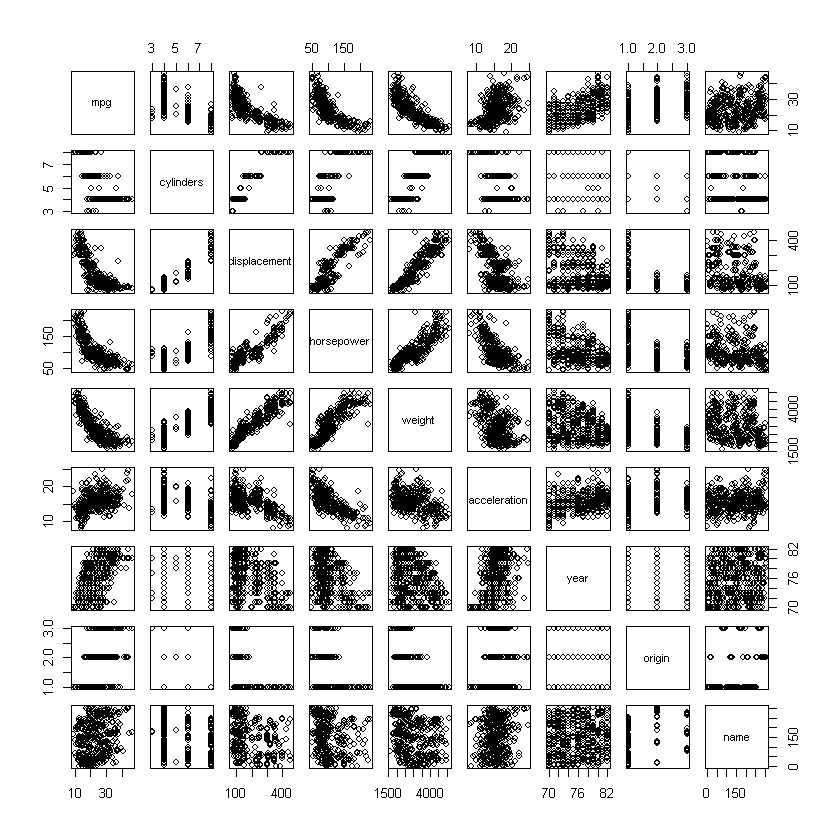

In [32]:
pairs(Auto)

In [39]:
cor(subset(Auto, select = -name))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


This is something interesting in the correlation matrix above. I did not expect mpg to be positively correlated with acceleration. 

Another obsevation is that any two variables have decent amount of correlation. The least correlated pair is year and origin. And we know they should not (?) be strongly correlated. 

In [40]:
auto.lm = lm(mpg ~ . - name, data = Auto)

In [41]:
summary(auto.lm)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


In [46]:
library(tidyr)
library(ggplot2)

In [48]:
subset(Auto, select = -name) %>% gather() %>% head()

key,value
<chr>,<dbl>
mpg,18
mpg,15
mpg,18
mpg,16
mpg,17
mpg,15


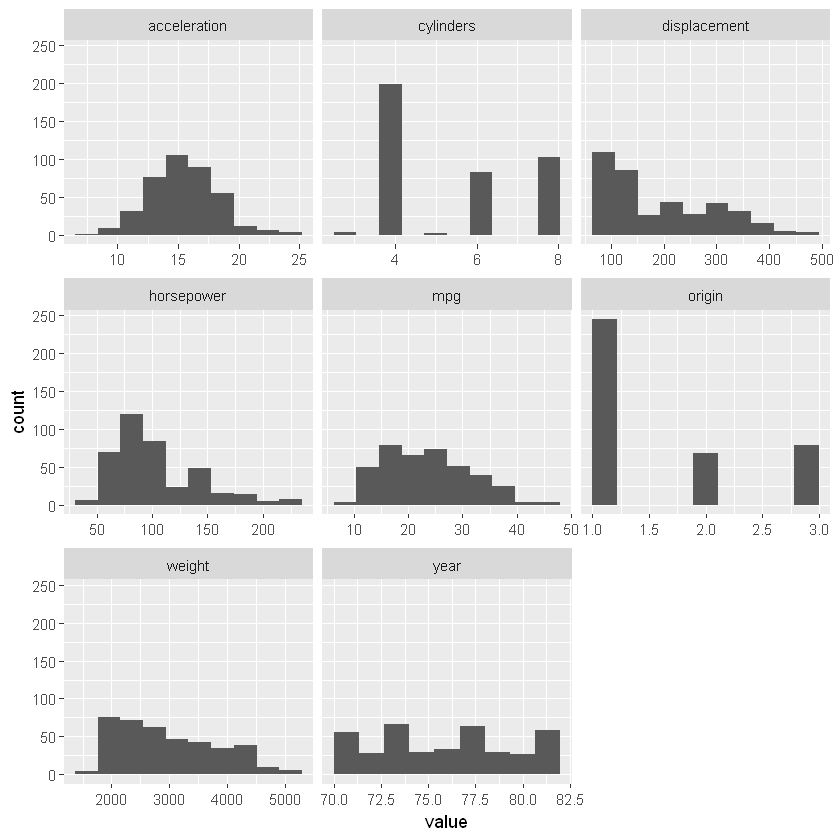

In [51]:
ggplot(gather(subset(Auto, select = -name)), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x') 

## Question 10 Carseats

In [61]:
data(Carseats)

In [63]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [64]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [66]:
seats.lm = lm(Sales ~ Price + Urban + US, data = Carseats)

In [67]:
summary(seats.lm)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


In [68]:
seats.lm2 = lm(Sales ~ Price + US, data = Carseats)
summary(seats.lm2)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


In [69]:
confint(seats.lm2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


Calculate the t-statistic for USYes by hand.

In [75]:
1.19964 / 0.25846

[1] 4.641492

Calculate the pvalue for USYes by hand

In [74]:
2 * (1 - pt(4.64149, 397))

[1] 4.707076e-06

Recall from simple linear regression with 1 predictor. 
$$\hat\beta_1 \sim N \left(\beta_1, \frac{\sigma^2}{\sum (X_i - \bar{X})^2}\right) $$
$$\hat\beta_0 \sim N \left(\beta_0, \sigma^2 \left( \frac1{n} + \frac{\bar{X}^2}{\sum (X_i - \bar{X})^2}\right)\right) $$
The standard error of the coefficients are estimated by replacing $\sigma^2$ with MSE. Therefore, the t statistics have the sample degree of freedom as the MSE.

## Question 11 Regression through the origin

In [78]:
set.seed(1)
x = rnorm(100)
y = 2 * x + rnorm(100)

In [79]:
simple.lm = lm(y ~ x + 0)
summary(simple.lm)


Call:
lm(formula = y ~ x + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9154 -0.6472 -0.1771  0.5056  2.3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1.9939     0.1065   18.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9586 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


In [80]:
simple.lm2 = lm(x ~ y + 0)
summary(simple.lm2)


Call:
lm(formula = x ~ y + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8699 -0.2368  0.1030  0.2858  0.8938 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y  0.39111    0.02089   18.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4246 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


The t-statistics are the same. 

## Question 13 Simulation of linear regression


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93842 -0.30688 -0.06975  0.26970  1.17309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.01885    0.04849 -21.010  < 2e-16 ***
x            0.49947    0.05386   9.273 4.58e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4814 on 98 degrees of freedom
Multiple R-squared:  0.4674,	Adjusted R-squared:  0.4619 
F-statistic: 85.99 on 1 and 98 DF,  p-value: 4.583e-15


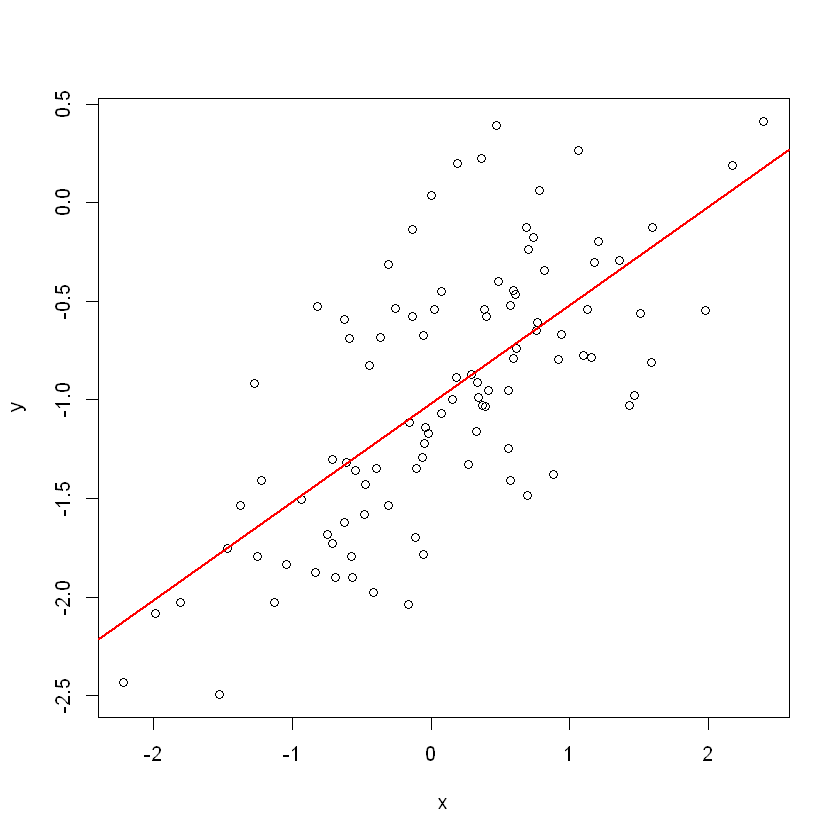

In [92]:
set.seed(1)
x = rnorm(100)
eps = rnorm(100, sd = sqrt(0.25))
y = -1 + 0.5 * x + eps
fit = lm(y ~ x)
plot(x, y)
abline(fit, lw = 2, col = "red")
summary(fit)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64471 -0.33990 -0.00769  0.37820  1.80147 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.018294   0.020153 -50.527   <2e-16 ***
x            0.503628   0.015913  31.649   <2e-16 ***
I(x^2)       0.009537   0.010879   0.877    0.381    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5203 on 997 degrees of freedom
Multiple R-squared:  0.5012,	Adjusted R-squared:  0.5002 
F-statistic: 500.8 on 2 and 997 DF,  p-value: < 2.2e-16


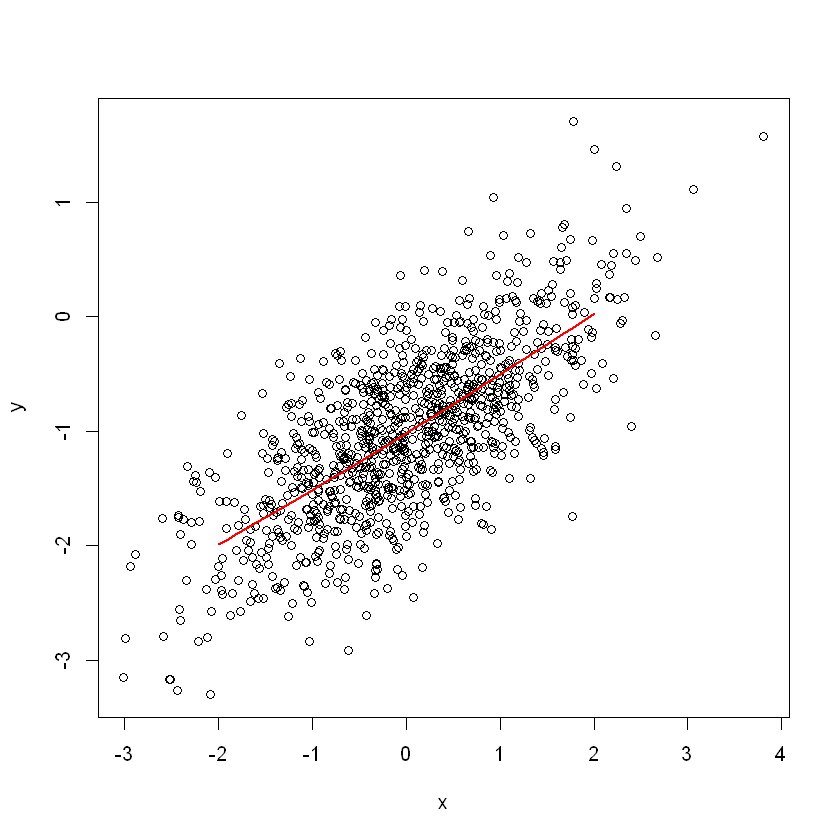

In [124]:
set.seed(1)
x = rnorm(1000)
eps = rnorm(1000, sd = sqrt(0.25))
y = -1 + 0.5 * x + eps
fit = lm(y ~ x + I(x^2)) # Do NOT forget the I(...)
plot(x, y)
xx = seq(-2, 2, by = 0.1)
lines(xx, predict(fit, newdata = data.frame(x = xx)), lw = 2, col = 'red')
summary(fit)

As you increase the amount of data generated for the fitting, the quadratic coefficient will become smalle and smaller since for the true model the quadratic coefficient is zero.

## Question 14 Collinearity

In [150]:
n = 10000
set.seed(1)
x1 = runif(n)
x2 = 0.5 * x1 + rnorm(n) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rnorm(n)

In [151]:
lm.fit = lm(y ~ x1 + x2)
summary(lm.fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7029 -0.6707  0.0055  0.6539  3.6299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.02039    0.01984 101.849  < 2e-16 ***
x1           1.99053    0.06104  32.609  < 2e-16 ***
x2           0.31715    0.10088   3.144  0.00167 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9976 on 9997 degrees of freedom
Multiple R-squared:  0.2828,	Adjusted R-squared:  0.2826 
F-statistic:  1971 on 2 and 9997 DF,  p-value: < 2.2e-16


In [152]:
0.5 * 0.62 + 1.86

[1] 2.17

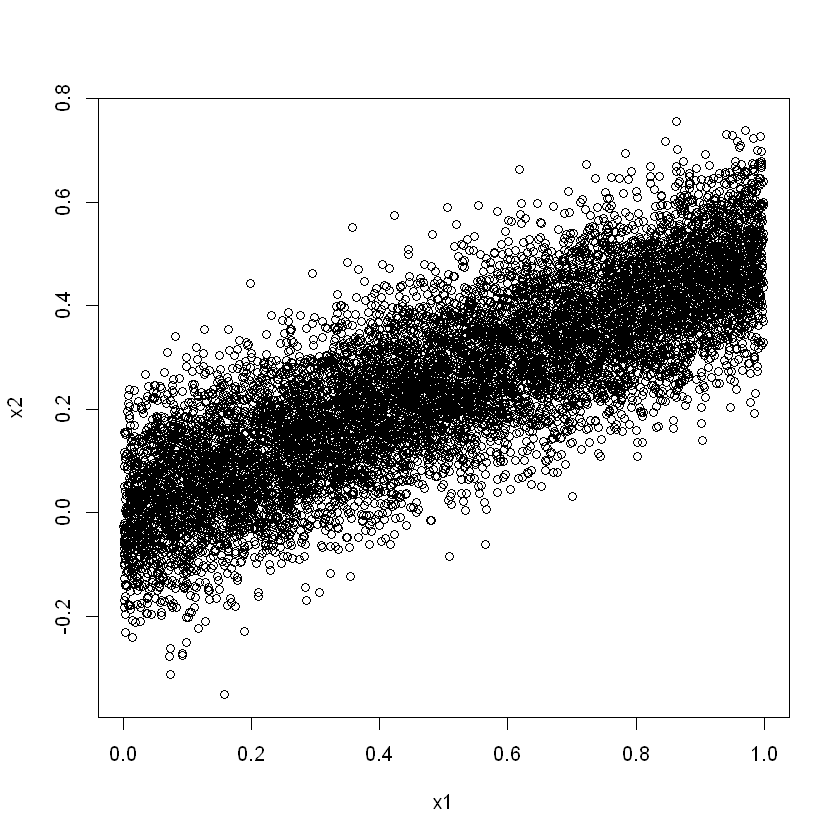

In [153]:
plot(x1, x2)

In [154]:
vif(lm.fit)

x1       x2 
3.171189 3.171189

The variance inflation factors are the same for the two predictorsr above. What does it mean?

In [155]:
summary(lm(y ~ x1))


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7010 -0.6736  0.0095  0.6509  3.6312 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.01977    0.01984  101.78   <2e-16 ***
x1           2.14933    0.03429   62.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.998 on 9998 degrees of freedom
Multiple R-squared:  0.2821,	Adjusted R-squared:  0.282 
F-statistic:  3928 on 1 and 9998 DF,  p-value: < 2.2e-16


In [156]:
summary(lm(y ~ x2))


Call:
lm(formula = y ~ x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9839 -0.7089 -0.0066  0.7005  3.9445 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.33965    0.01815  128.93   <2e-16 ***
x2           3.03898    0.05958   51.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.049 on 9998 degrees of freedom
Multiple R-squared:  0.2065,	Adjusted R-squared:  0.2064 
F-statistic:  2602 on 1 and 9998 DF,  p-value: < 2.2e-16


The R squared looks small but the main reason is that our data is inherently spread-out. This is not because our fit is bad.